# Mi primera red neuronal
En este practico trabajaremos con la base de datos de MNIST. Esta base de datos consta de digitos escritos a mano. Para el final de este trabajo practico, habran implementado una red neuronal profunda que sepa reconocer cada uno de estos digitos.

### Atencion! Trata de no cambiar los nombres de las variables! Recuerda que testearemos estas pruebas automaticamente.

## Pregunta 1
### Importar los datos
Lo primero que tendras que hacer es bajar la base de datos. Por suerte, esta no es una tarea demasiado dificil, ya que el mismo tensorflow la posee y podras buscar en su codigo como cargarla a memoria.
Sin embargo, tienes que investigar como hacerlo.
[datasets de tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [3]:
import tensorflow as tf


2023-07-14 13:47:38.432281: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-14 13:47:38.736426: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-14 13:47:38.740148: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 13:47:40.270062: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Descomenta (saca la #) la proxima linea de codigo e implementa la linea
# que bajara la base de datos mnist
# (x_train, train_labels), (x_test, test_labels) = # linea_de_codigo_aqui


### BEGIN SOLUTION
(x_train, train_labels), (x_test, test_labels) = tf.keras.datasets.mnist.load_data()
### END SOLUTION

11490434/11490434 [==============================] - 4s 0us/step


In [5]:
# Imprimimos ahora X_train para ver que tiene adentro ...
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
# E imprimimos test_labels para ver que tiene tambien ...
print(test_labels)

[7 2 1 ... 4 5 6]


In [7]:
# Tambien podemos imprimir el shape (la forma) de X_train para ver que es.
# Vemos que es una matriz de 60000 x 28 x 28.
print(x_train.shape)


(60000, 28, 28)


In [8]:
import matplotlib.pyplot as plt
# Sabemos que son imagenes, asi que importemos matplotlib


ModuleNotFoundError: No module named 'matplotlib'

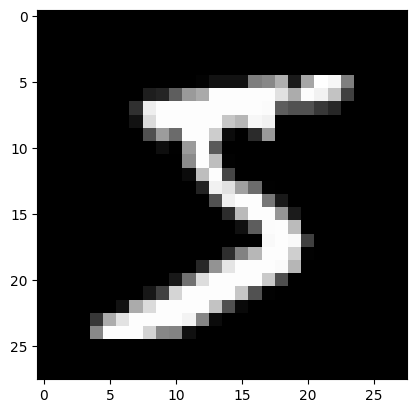

In [ ]:
plt.imshow(x_train[0], cmap="gray")

52668


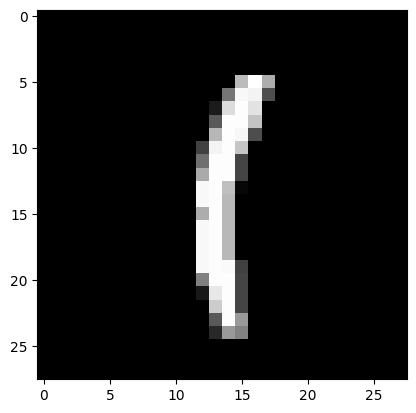

In [ ]:
import random as rd
rn = rd.randint(0, 60000)
print(rn)

# Pueden correr este bloque de codigo las veces que quieran para ver ejemplos
plt.imshow(x_train[rn], cmap='gray')

In [ ]:
# TEST CELL
assert x_train is not None, "No has cargado los datos de entrenamiento"
assert x_test is not None, "No has cargado los datos de prueba"


In [ ]:
# Normalizando los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

## Pregunta 2
### Parte 2: Creación del Modelo

Crea un modelo de red neuronal utilizando la API de Keras en TensorFlow. Tu modelo debería seguir la estructura siguiente:

1. Una capa de aplanamiento (`Flatten`) que convierta las imágenes de 28x28 píxeles en un vector unidimensional.
2. Una capa densa (`Dense`) con 128 neuronas y función de activación ReLU.
3. Una capa de dropout (`Dropout`) con una tasa de 0.2, para ayudar a prevenir el sobreajuste.
4. Una capa densa final (`Dense`) con 10 neuronas (una para cada dígito del 0 al 9) y función de activación softmax (para la clasificación multiclase).

Guarda tu modelo en una variable llamada `model`.


In [ ]:

### BEGIN SOLUTION
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
### END SOLUTION


In [ ]:
# TEST CELL
assert model is not None, "No has creado el modelo!"
assert isinstance(model, tf.keras.models.Sequential), "Tu modelo debe ser una instancia de tf.keras.models.Sequential"
# assert len(model.layers) == 4, "Tu modelo debe tener exactamente 4 capas"


In [ ]:
"""
Ahora compila tu modelo utilizando el optimizador `adam` y la función de pérdida `sparse_categorical_crossentropy`. También debes monitorear la métrica de `accuracy`.
"""


'\nAhora compila tu modelo utilizando el optimizador `adam` y la función de pérdida `sparse_categorical_crossentropy`. También debes monitorear la métrica de `accuracy`.\n'

In [ ]:


### BEGIN SOLUTION
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
### END SOLUTION


In [ ]:
# TEST CELL
assert model.optimizer is not None, "No has configurado un optimizador para tu modelo"
assert model.loss is not None, "No has configurado una función de pérdida para tu modelo"
# assert "accuracy" in model.metrics_names, "Debes monitorear la métrica 'accuracy'"


## Pregunta 3
### Parte 3: Entrenamiento del Modelo

Entrena tu modelo en los datos de entrenamiento durante al menos 5 épocas y guarda el objeto de historial devuelto por `model.fit()` en una variable llamada `history`. No olvides también proporcionar los datos de validación.



In [ ]:

### BEGIN SOLUTION
history = model.fit(x_train, train_labels, epochs=5, validation_data=(x_test, test_labels))
### END SOLUTION


Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2988 - accuracy: 0.9119 - val_loss: 0.1393 - val_accuracy: 0.9593
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1456 - accuracy: 0.9568 - val_loss: 0.1052 - val_accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1087 - accuracy: 0.9664 - val_loss: 0.0866 - val_accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0894 - accuracy: 0.9728 - val_loss: 0.0762 - val_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0761 - accuracy: 0.9766 - val_loss: 0.0701 - val_accuracy: 0.9774


In [ ]:
# TEST CELL
assert history is not None, "No has entrenado el modelo"
assert len(history.history['loss']) >= 5, "Debes entrenar el modelo durante al menos 5 épocas"



In [ ]:
"""
Una vez que tu modelo esté entrenado, visualiza la evolución de la precisión de entrenamiento y validación a lo largo de las épocas. Puedes usar `matplotlib.pyplot` para esto.
"""


'\nUna vez que tu modelo esté entrenado, visualiza la evolución de la precisión de entrenamiento y validación a lo largo de las épocas. Puedes usar `matplotlib.pyplot` para esto.\n'

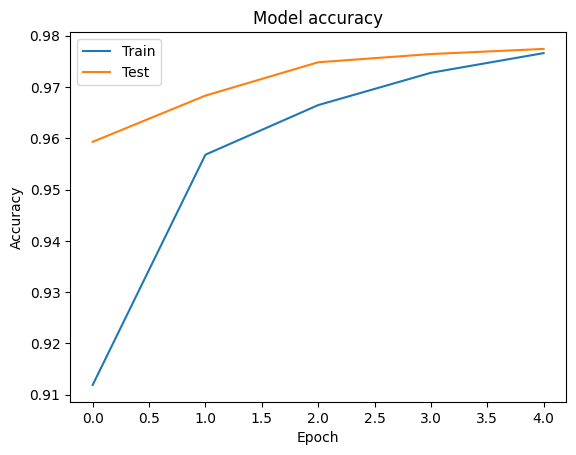

In [ ]:

### BEGIN SOLUTION
import matplotlib.pyplot as plt

# Plotting training accuracy
plt.plot(history.history['accuracy'])
# Plotting validation accuracy
plt.plot(history.history['val_accuracy'])
# Setting title and labels
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
### END SOLUTION


Aquí te mostramos un ejemplo de cómo debería verse tu gráfico. La precisión de entrenamiento y validación deberían aumentar con el tiempo, y la precisión de validación debería ser algo menor que la de entrenamiento.

Recuerda, la precisión exacta puede variar debido a la naturaleza estocástica del entrenamiento de la red neuronal, por lo que no te preocupes si tus números no coinciden exactamente con los del ejemplo.

Por que la validacion da un accuracy mas alto que los datos de entrenamiento? No deberia ser al reves?
Normalmente si! Esto que ven aqui es un caso atipico. Lo que pasa es que nuestra capa "Dropout", que sirve para prevenir overfitting, esta funcionando demasiado bien! Tan bien que nos da vuelta a los resultados que esperamos.

El dropout simplemente corta "conexiones" entre neuronas al azar para prevenir el overfitting, pero despues la validacion se hace usando todas las conexiones! (porque ya prevenimos el overfitting).


In [ ]:
# Probemos haciendo lo mismo, pero sin dropout

# Definimos la arquitectura
model_nodrop = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compilamos
model_nodrop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fiteamos (entrenamos), gurdando los datos en history
history_nodrop = model_nodrop.fit(x_train, train_labels, epochs=5, validation_data=(x_test, test_labels))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2610 - accuracy: 0.9255 - val_loss: 0.1430 - val_accuracy: 0.9581
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1158 - accuracy: 0.9660 - val_loss: 0.1177 - val_accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0801 - accuracy: 0.9760 - val_loss: 0.0911 - val_accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 0.0793 - val_accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.0799 - val_accuracy: 0.9759


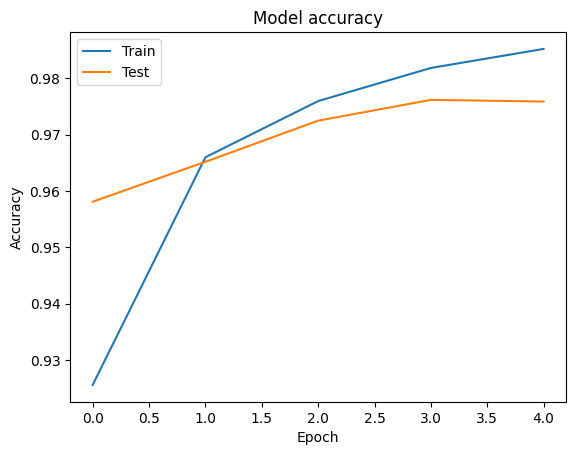

In [ ]:
import matplotlib.pyplot as plt

# Plotting training accuracy
plt.plot(history_nodrop.history['accuracy'])
# Plotting validation accuracy
plt.plot(history_nodrop.history['val_accuracy'])
# Setting title and labels
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Veremos que el comienzo de este grafico puede llegar a ser algo atipico, pero puede ser un efecto del azar, ya no tenemos un grafico claramente invertido.
# Prueben aumentando el numero de epocas. Que sucede? Como cambia el grafico?
# Recuerden que cada vez que corren el modelo hay un efecto del azar

In [ ]:
# Esta celda servia solo a modo ilustrativo ...
"""
import numpy as np

# Example data
epochs = np.arange(1, 6)
train_acc = np.array([0.92, 0.94, 0.95, 0.96, 0.97])
val_acc = np.array([0.91, 0.92, 0.93, 0.93, 0.94])

# Plotting training accuracy
plt.plot(epochs, train_acc)
# Plotting validation accuracy
plt.plot(epochs, val_acc)
# Setting title and labels
plt.title('Example - Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
"""

"\nimport numpy as np\n\n# Example data\nepochs = np.arange(1, 6)\ntrain_acc = np.array([0.92, 0.94, 0.95, 0.96, 0.97])\nval_acc = np.array([0.91, 0.92, 0.93, 0.93, 0.94])\n\n# Plotting training accuracy\nplt.plot(epochs, train_acc)\n# Plotting validation accuracy\nplt.plot(epochs, val_acc)\n# Setting title and labels\nplt.title('Example - Model accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Test'], loc='upper left')\nplt.show()\n"

## Pregunta 4
### Parte 4: Evaluación del Modelo

Ahora que has entrenado tu modelo, debes evaluar su rendimiento en los datos de prueba. Usa la función `model.evaluate()` para hacerlo y guarda el resultado en una variable llamada `test_loss, test_acc`.


In [ ]:

# Los inviten a que testeen y comparen este modelo con el otro (el que no tiene dropout). Recuerdan como lo habiamos llamado?
test_loss, test_acc = model.evaluate(x_test, test_labels)



313/313 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9774


In [ ]:
# TEST CELL
assert test_acc is not None, "No has evaluado el modelo en los datos de prueba"
assert 0 <= test_acc <= 1, "La precisión debe estar entre 0 y 1"


Finalmente, imprime la precisión del modelo en los datos de prueba.


In [ ]:

### BEGIN SOLUTION
print(f'La precisión del modelo en los datos de prueba es: {test_acc*100:.2f}%')
### END SOLUTION


La precisión del modelo en los datos de prueba es: 97.74%


In [ ]:
x_test.shape

(10000, 28, 28)

1/1 [==============================] - 0s 124ms/step
La prediccion del numero que estan viendo es 3
1/1 [==============================] - 0s 48ms/step
La prediccion sin dropout del numero que estan viendo es 3


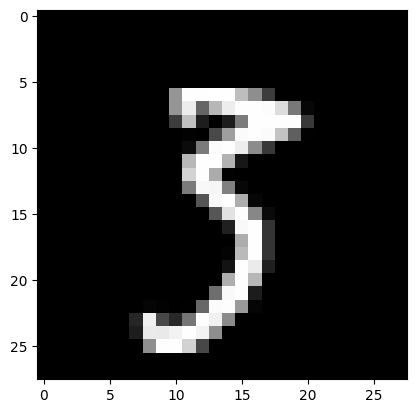

In [ ]:
# Muy bonitas graficas, pero ... para que sirve??
import numpy as np
rn = rd.randint(0, 10000)


plt.imshow(x_test[rn], cmap='gray')

numero = x_test[rn].reshape(1,28,28,1)
# print(numero.shape)

# La prediccion arroja siempre un array de numeros que indica la probabilidad de cada clase
# La prediccion mas alta es la que nos interesa ahora. Logramos eso con la funcion de numpy: argmax

array_de_probabilidades = model.predict(numero) # Los invito a que prueben imprimir este array en otro bloque para ver que tiene

numero_pred = np.argmax(array_de_probabilidades)
print(f"La prediccion del numero que estan viendo es {numero_pred}")

numero_pred_nodrop = np.argmax(model_nodrop.predict(numero))
print(f"La prediccion sin dropout del numero que estan viendo es {numero_pred_nodrop}")

## Pregunta 5
### Parte 5: Interpretación de Resultados

Por favor, escribe un breve párrafo en el que interpretes los resultados obtenidos. ¿Cómo evolucionó la precisión de tu modelo durante el entrenamiento? ¿Cómo se compara la precisión de entrenamiento con la de validación? ¿Estás satisfecho con la precisión del modelo en los datos de prueba?


#### Escribe aqui tu respuesta
